In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

# Import Data

In [4]:
df = pd.read_excel('Data/Default.xlsx')
df['default2'] = df.default.factorize()[0]
df['student2'] = df.default.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,0
3,No,No,1073.549164,31767.138947,0,0


# 4.1

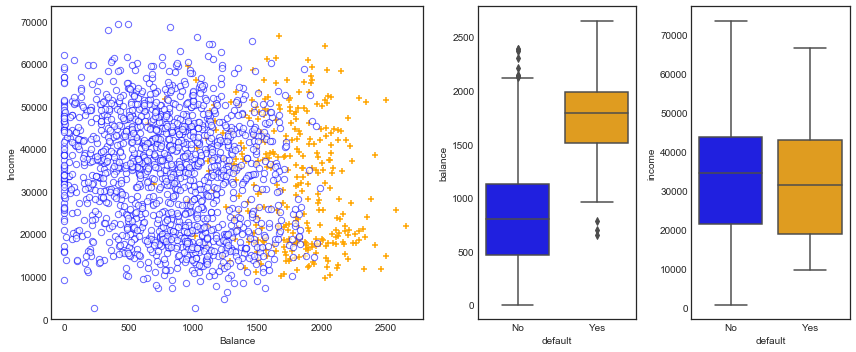

In [10]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
axis1 = plt.subplot(gs[0,:-2])
axis2 = plt.subplot(gs[0,-2])
axis3 = plt.subplot(gs[0,-1])

#Fraction of value no
df_no = df[df.default2 ==0].sample(frac=0.15)
#Fraction of value yes
df_yes = df[df.default2 ==1]
df_ = df_no.append(df_yes)

axis1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',  linewidths=1)
axis1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o',  linewidths=1, edgecolors = 'blue', facecolors='white', alpha=.6)

axis1.set_ylim(bottom=0) #replaces ymin
axis1.set_ylabel('Income')
axis1.set_xlim(left=-100) #replaces xmin
axis1.set_xlabel('Balance')

c_palette = {'No': 'Blue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=axis2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=axis3, palette=c_palette)
gs.tight_layout(plt.gcf())